In [12]:
# Loading libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the combined metadata CSV file
current_dir = os.getcwd()
author_ethnicity_path = os.path.join(current_dir, '..', 'data', 'authors','authors_ethnicity.csv') 
bert_topics_path = os.path.join(current_dir, '..', 'data', 'subjects', 'subjects_classification_using_bert.csv')
simple_subjects_path = os.path.join(current_dir, '..', 'data', 'subjects', 'subjects_simple.csv')


# Load the datasets
author_ethnicity_df = pd.read_csv(author_ethnicity_path)
bert_topics_df = pd.read_csv(bert_topics_path)
simple_subjects_df = pd.read_csv(simple_subjects_path)

# Merge the datasets
merged_bert_df = pd.merge(author_ethnicity_df, bert_topics_df, on=['research_paper_id', 'year'], how='inner')
merged_simple_df = pd.merge(author_ethnicity_df, simple_subjects_df, on=['research_paper_id', 'year'], how='inner')

In [20]:
# Function to create plot for a given ethnicity and category (topic or subject)

def plot_research_patterns(ethnicity, category):
    # Filter data for the specified ethnicity
    filtered_bert_df = merged_bert_df[merged_bert_df['predicted_ethnicity'] == ethnicity]
    filtered_simple_df = merged_simple_df[merged_simple_df['predicted_ethnicity'] == ethnicity]

    # Aggregate data
    if category == 'topic':
        agg_df = filtered_bert_df.groupby(['year', 'predicted_topic']).size().reset_index(name='count')
        col = 'predicted_topic'
        title = 'BERT Topics'
    elif category == 'subject':
        agg_df = filtered_simple_df.groupby(['year', 'subject']).size().reset_index(name='count')
        # Filter out subjects "AI", "MIT" and "Artifical Intelligence"
        agg_df = agg_df[~agg_df['subject'].isin(['AI', 'MIT', 'Artificial Intelligence'])]
        top_items = agg_df.groupby('subject')['count'].sum().nlargest(7).index
        agg_df = agg_df[agg_df['subject'].isin(top_items)]
        col = 'subject'
        title = 'Subjects'
    else:
        raise ValueError("Invalid category. Please choose either 'topic' or 'subject'.")

    # Plot the data
    plt.figure(figsize=(8, 4))
    for item in agg_df[col].unique():
        item_data = agg_df[agg_df[col] == item]
        plt.plot(item_data['year'], item_data['count'], label=item)
    plt.title(f'Research Paper Count by Year and {title} for {ethnicity}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

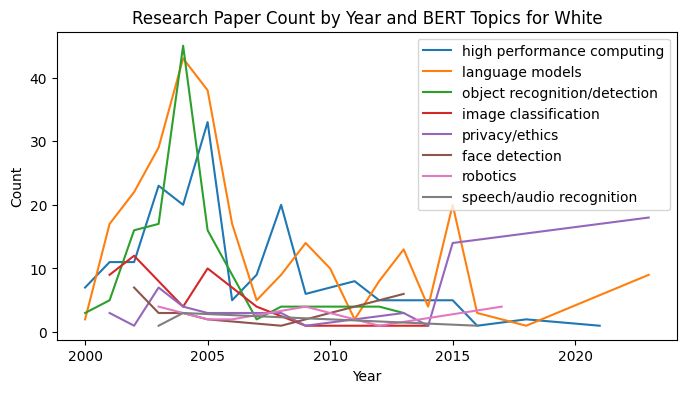

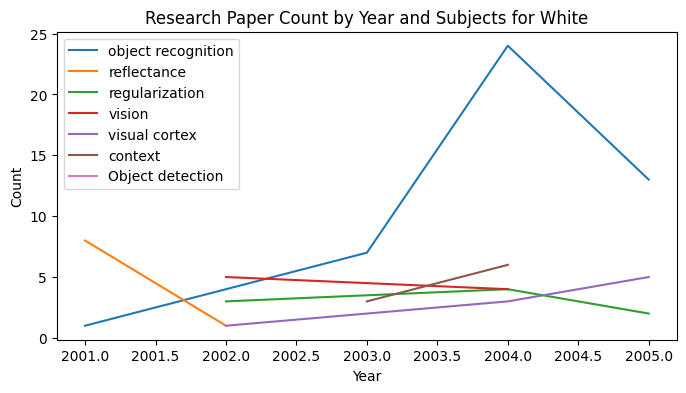

In [21]:
# Calling the function above for predicted ethnicity 'White'
plot_research_patterns('White', 'topic')
plot_research_patterns('White', 'subject')

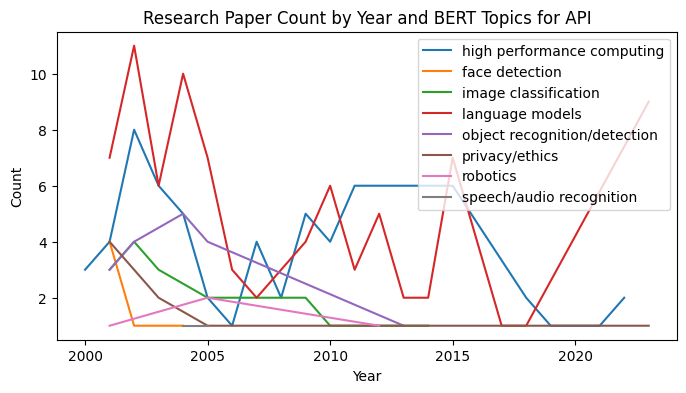

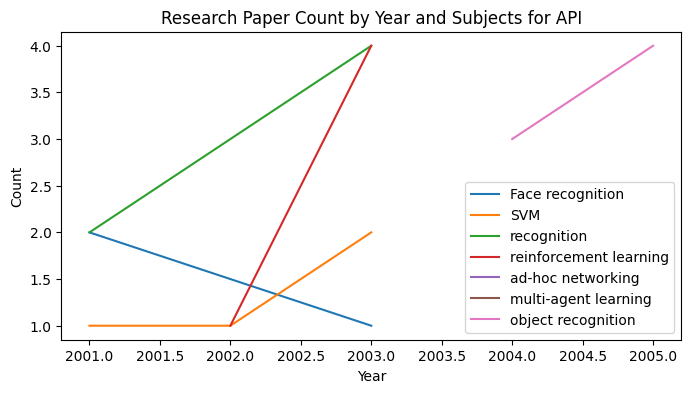

In [23]:
# Calling the function above for predicted ethnicity 'Asian'
plot_research_patterns('API', 'topic')
plot_research_patterns('API', 'subject')